In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from IPython.display import display, HTML


#  Initial Dataset

#### I created the initial dataset which contains monthly data from January 2004 until July 2021
#### At the first five columns there are the monthly sales for 5 partivular car brands
#### Google Trends data which were extracted with 2 different approaches from the platform ( gt1....) and (gt2....)
#### Economic variables, indicators  of unemployment, monthly Gross Domestic Product (Qgdp_Maverage), gasoline prices with and without taxes (gas_wt, gas_wot), monthly closinf prices of the Athens Stock Exchange General Index (gd_at) and data from Google Trends related to searching terms such as: crisis, memorandum, debt, cuts, firings (gt_crisisTh, gt_memTh, gt_debtTh, gt_cuts, gt_fir respectively in greek).

In [2]:
dataset=pd.read_excel('/Users/loukas/Desktop/dataset.xlsx',sheet_name=0,index_col='date')

In [3]:
dataset

,#,TOYOTA,AUDI,OPEL,FORD,FIAT,gt1_toyota,gt1_audi,gt1_opel,gt1_ford,...,unemployment,Qgdp_Maverage,gas_wt,gas_wot,gd_at,gt_crisisTh,gt_memTh,gt_debtTh,gt_cuts,gt_fir
date,,,,,,,,,,,,,,,,,,,,,
2004-01,1,3938,654,1753,2083,1911,31,69,0,100,...,0.118000,14959.351785,737.05,323.825000,2432.58,55,27,0,0,0
2004-02,2,2253,383,1396,1397,1397,77,73,99,96,...,0.111000,14959.351785,742.00,327.950000,2451.50,0,0,0,0,0
2004-03,3,2789,526,1876,1802,1671,77,49,33,88,...,0.114000,14959.351785,770.82,352.000000,2370.65,0,0,0,0,0
2004-04,4,3105,564,1656,1461,1866,52,30,95,20,...,0.107000,15868.333380,790.55,368.450000,2517.62,0,0,0,0,0
2004-05,5,2318,473,2097,1124,1736,67,64,65,90,...,0.102000,15868.333380,836.70,407.050000,2423.72,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03,207,1148,302,500,365,303,53,32,27,39,...,0.173421,13066.469292,1585.00,566.776000,865.05,3,1,8,4,13
2021-04,208,1262,369,736,296,381,57,33,26,40,...,0.170421,NaN,1600.00,578.773333,910.37,3,2,6,8,17
2021-05,209,1238,326,695,331,565,60,32,31,42,...,0.153835,NaN,1608.80,585.706000,894.85,3,1,3,4,6


## Preliminary Analysis TOYOTA

#### Below there is a preliminary analysis for the TOYOTA brand it concerns mostly the correlarions between the indepedent variables and the depedent one (monthly TOYOTA sales in Greece) in order to have the insight otheir predictive power. The same will be performed for the rest of the brands.

In [4]:
toyota=dataset.loc[:,['TOYOTA','gt1_toyota','gt2_toyota']+list(dataset.columns[16:])]

toyota

,TOYOTA,gt1_toyota,gt2_toyota,unemployment,Qgdp_Maverage,gas_wt,gas_wot,gd_at,gt_crisisTh,gt_memTh,gt_debtTh,gt_cuts,gt_fir
date,,,,,,,,,,,,,
2004-01,3938,31,44,0.118000,14959.351785,737.05,323.825000,2432.58,55,27,0,0,0
2004-02,2253,77,9,0.111000,14959.351785,742.00,327.950000,2451.50,0,0,0,0,0
2004-03,2789,77,33,0.114000,14959.351785,770.82,352.000000,2370.65,0,0,0,0,0
2004-04,3105,52,25,0.107000,15868.333380,790.55,368.450000,2517.62,0,0,0,0,0
2004-05,2318,67,36,0.102000,15868.333380,836.70,407.050000,2423.72,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03,1148,53,59,0.173421,13066.469292,1585.00,566.776000,865.05,3,1,8,4,13
2021-04,1262,57,58,0.170421,NaN,1600.00,578.773333,910.37,3,2,6,8,17
2021-05,1238,60,63,0.153835,NaN,1608.80,585.706000,894.85,3,1,3,4,6


#### Scatterplots among variables

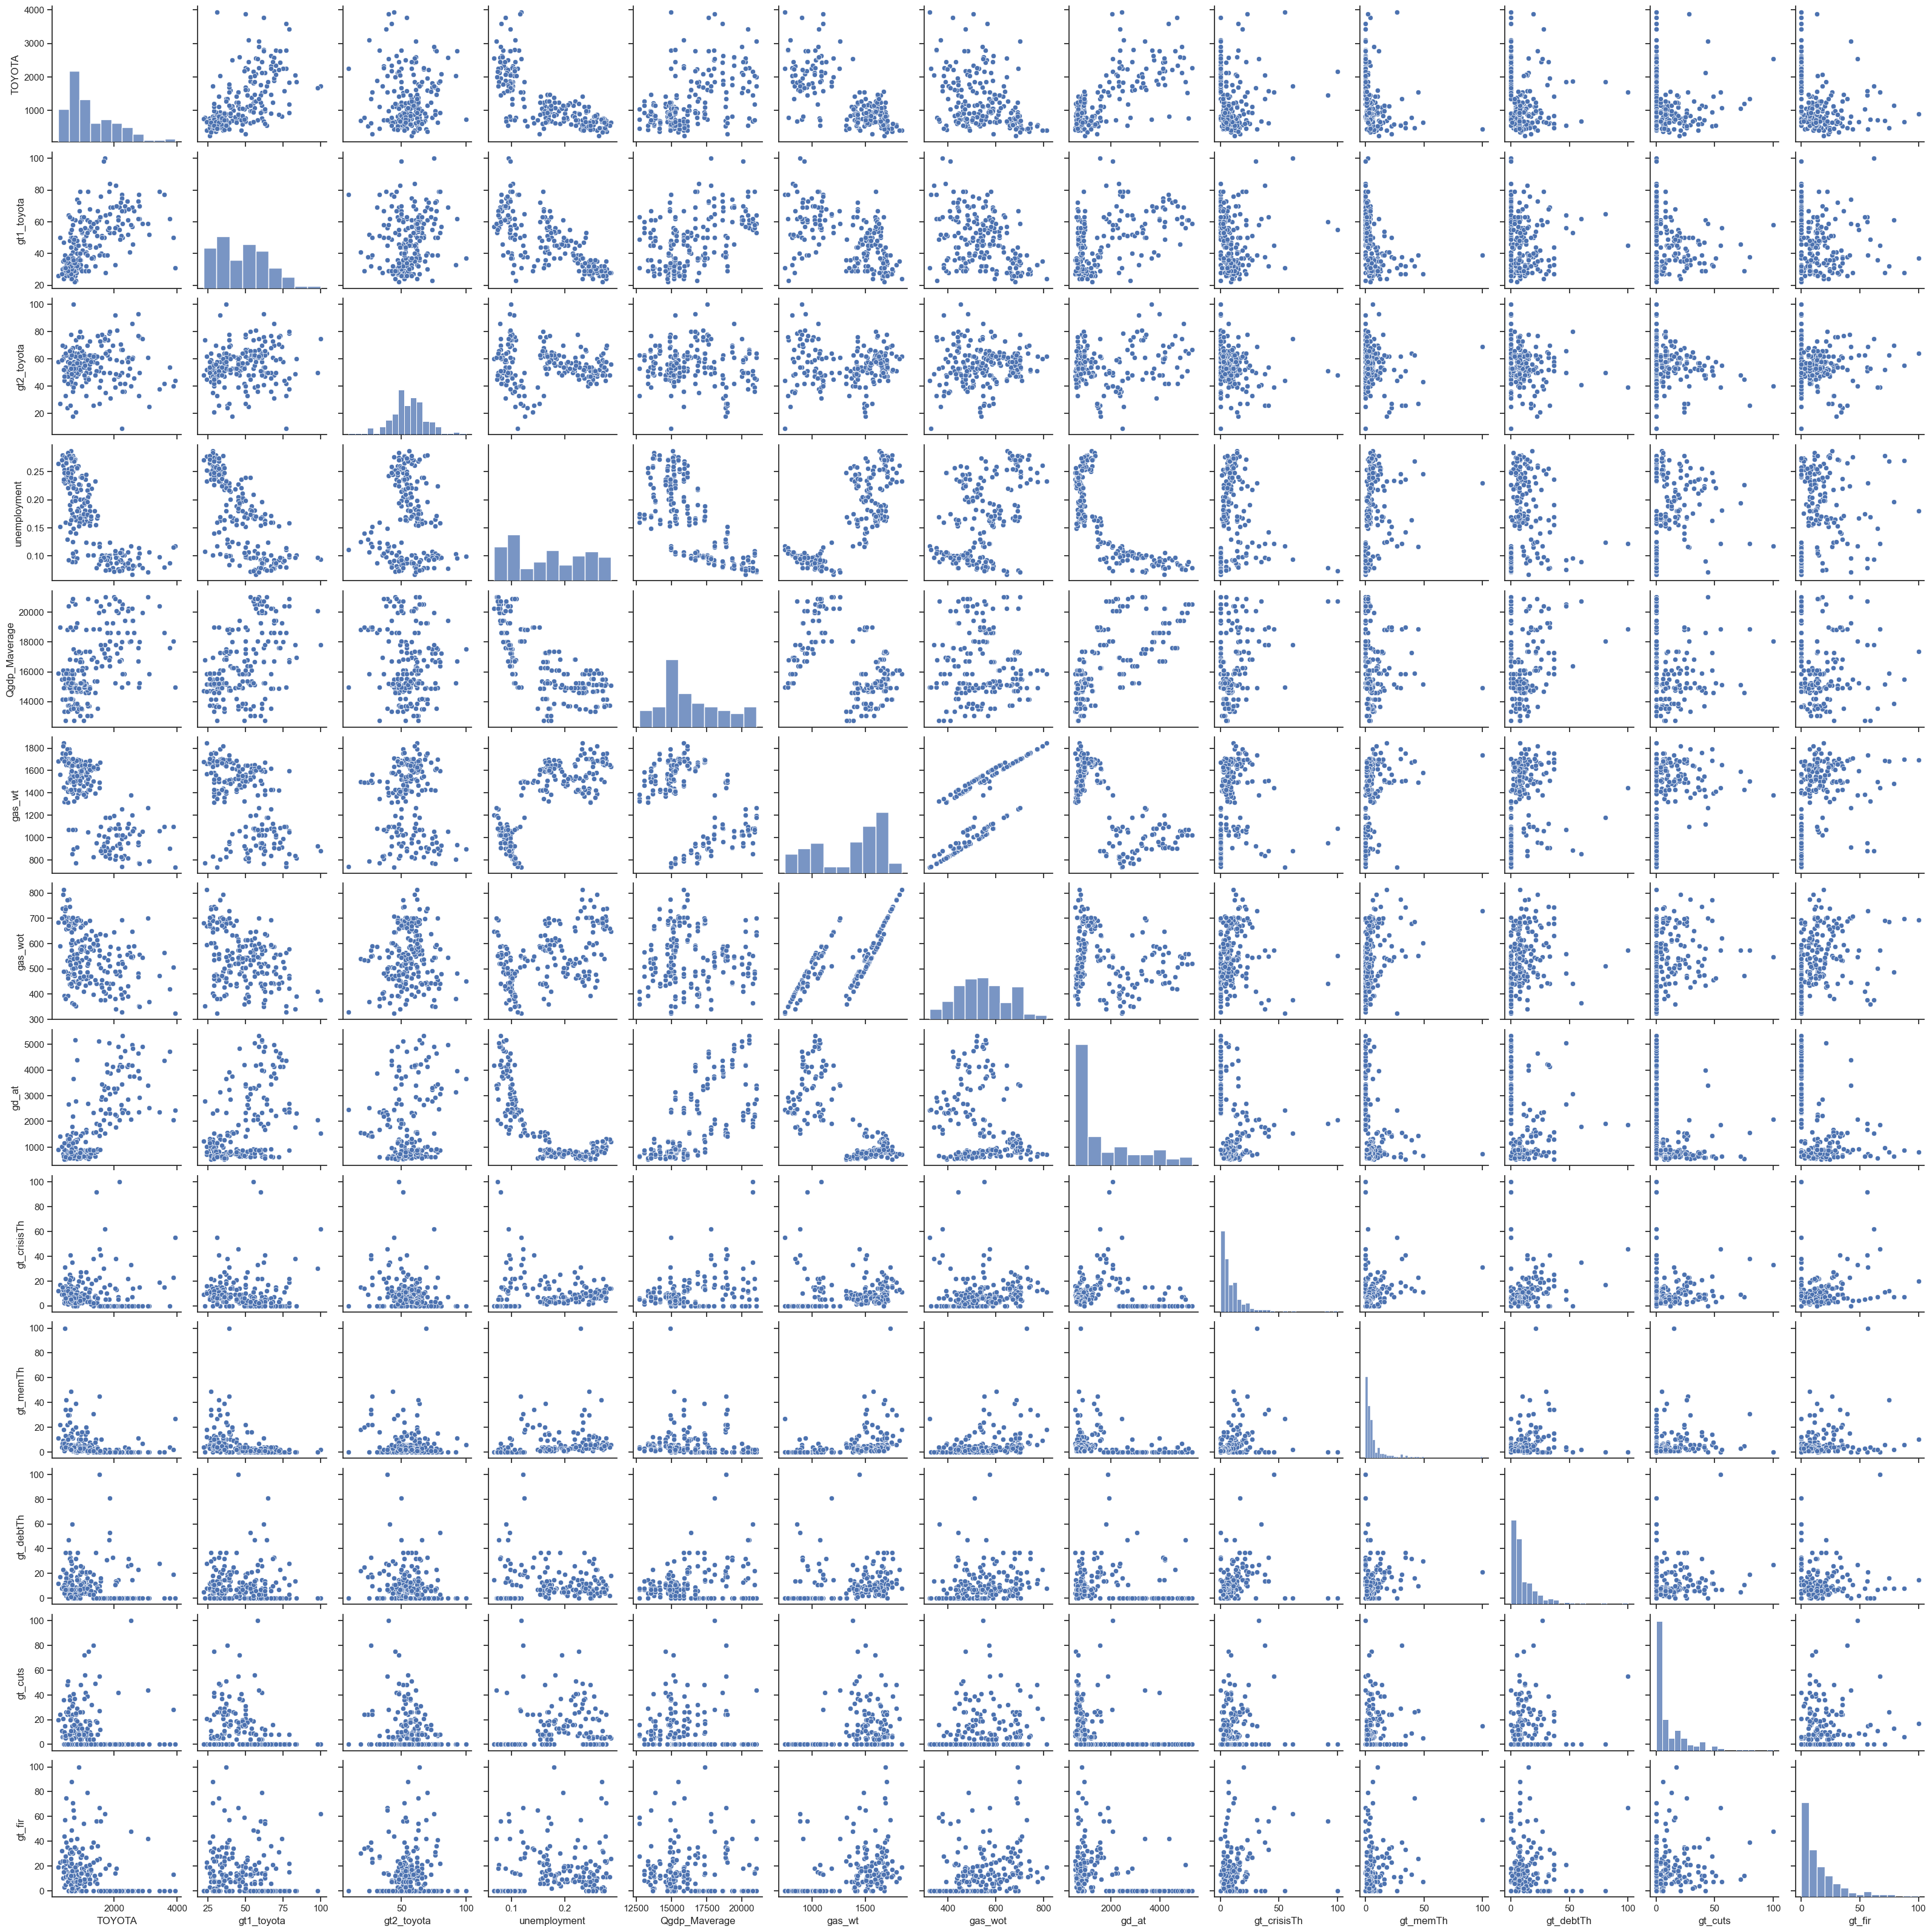

In [5]:
sns.set_theme(style="ticks")


sns.pairplot(toyota)




plt.show()

#### and correlation matrix

In [6]:
toyota.corr()


,TOYOTA,gt1_toyota,gt2_toyota,unemployment,Qgdp_Maverage,gas_wt,gas_wot,gd_at,gt_crisisTh,gt_memTh,gt_debtTh,gt_cuts,gt_fir
TOYOTA,1.000000,0.570455,0.022389,-0.738054,0.490694,-0.715902,-0.371030,0.718129,0.003033,-0.281333,-0.134975,-0.184204,-0.329027
gt1_toyota,0.570455,1.000000,0.181155,-0.720355,0.458349,-0.556383,-0.418169,0.482434,-0.013498,-0.359761,-0.086045,-0.224611,-0.149357
gt2_toyota,0.022389,0.181155,1.000000,-0.074395,-0.088597,-0.047291,0.058867,0.150182,-0.222783,-0.128837,-0.138608,-0.169839,-0.027128
unemployment,-0.738054,-0.720355,-0.074395,1.000000,-0.727734,0.796695,0.470677,-0.777233,-0.040355,0.260509,0.026303,0.241443,0.235296
Qgdp_Maverage,0.490694,0.458349,-0.088597,-0.727734,1.000000,-0.496121,-0.027090,0.697476,0.249389,-0.077801,0.185570,-0.152874,-0.121166
gas_wt,-0.715902,-0.556383,-0.047291,0.796695,-0.496121,1.000000,0.749629,-0.755282,0.028470,0.353741,0.179766,0.354197,0.391470
gas_wot,-0.371030,-0.418169,0.058867,0.470677,-0.027090,0.749629,1.000000,-0.245795,0.056564,0.327186,0.177939,0.154308,0.250063
gd_at,0.718129,0.482434,0.150182,-0.777233,0.697476,-0.755282,-0.245795,1.000000,-0.143414,-0.256556,-0.113330,-0.348506,-0.366579
gt_crisisTh,0.003033,-0.013498,-0.222783,-0.040355,0.249389,0.028470,0.056564,-0.143414,1.000000,0.246019,0.295035,0.131387,0.315714
gt_memTh,-0.281333,-0.359761,-0.128837,0.260509,-0.077801,0.353741,0.327186,-0.256556,0.246019,1.000000,0.232322,0.161938,0.256704


#### Some of the independent variables have better correlations than others, that will occur to their probable exclusion from the final predictive models

## Time lags και cross-corelation

#### Concerning the forecast time horizon my initial plan is to calculate cross-corelations between the indepedent and the dependen variable to find the optimal lag of each pair. For which n the Yt (dependent, sales) correlates better with Xt-n (independent). So the current independent variable datapoint predicts the dependent variable datapoints after n months.

In [7]:
cr_v={}
for i in toyota.columns[1:]:
    if i == 'unemployment':
        y=toyota['TOYOTA'][:-2]
        x=toyota[f'{i}'][:-2]
        c=sm.tsa.stattools.ccf(x, y, adjusted=False)
        cr_v[f"{i}"]=[np.argmax(abs(c)),c[np.argmax(abs(c))],c[4],c[12]]
    
    elif i == 'Qgdp_Maverage': 
        y=toyota['TOYOTA'][:-4]
        x=toyota[f'{i}'][:-4]      
        c=sm.tsa.stattools.ccf(x, y, adjusted=False) 
        cr_v[f"{i}"]=[np.argmax(abs(c)),c[np.argmax(abs(c))],c[4],c[12]]



    else:        
        y=toyota['TOYOTA'][:-1]
        x=toyota[f'{i}'][:-1]
        c=sm.tsa.stattools.ccf(x, y, adjusted=False)
        cr_v[f"{i}"]=[np.argmax(abs(c)),c[np.argmax(abs(c))],c[4],c[12]]



        





pd.DataFrame(cr_v,index=['opt','cor_opt','cor4','cor12'])

,gt1_toyota,gt2_toyota,unemployment,Qgdp_Maverage,gas_wt,gas_wot,gd_at,gt_crisisTh,gt_memTh,gt_debtTh,gt_cuts,gt_fir
opt,0.000000,76.000000,3.000000,15.000000,0.000000,51.000000,0.000000,57.000000,49.000000,46.000000,7.000000,0.000000
cor_opt,0.570231,-0.267628,-0.761563,0.724888,-0.719610,0.392489,0.720128,0.494638,0.329710,0.369172,-0.279440,-0.328966
cor4,0.463995,0.039032,-0.760464,0.660511,-0.675708,-0.334807,0.692695,0.037068,-0.207542,-0.101581,-0.195009,-0.234192
cor12,0.515431,0.074148,-0.726847,0.560609,-0.589400,-0.270695,0.647010,0.150568,-0.095662,0.046455,-0.162201,-0.201937


#### At the table above you can see the optimal lags between each of the independent and the dependent variable. There are some satisfying values. But for some of the lags I think it has no point to build models (76 months ahead etc).

#### Aditionally at the last two columns of the table aboce you can see the correlations for time horizon of 4 and 12 months. Since the correlation values for the 4 and 12 month time horizon do not diverge a lot from the optimals, one of these two time horizon values will be used to implement the predictive models.

## Ploting the monthly sales of TOYOTA

You can see the decrease of the sales after the begining of the greek financial crisis around 2010

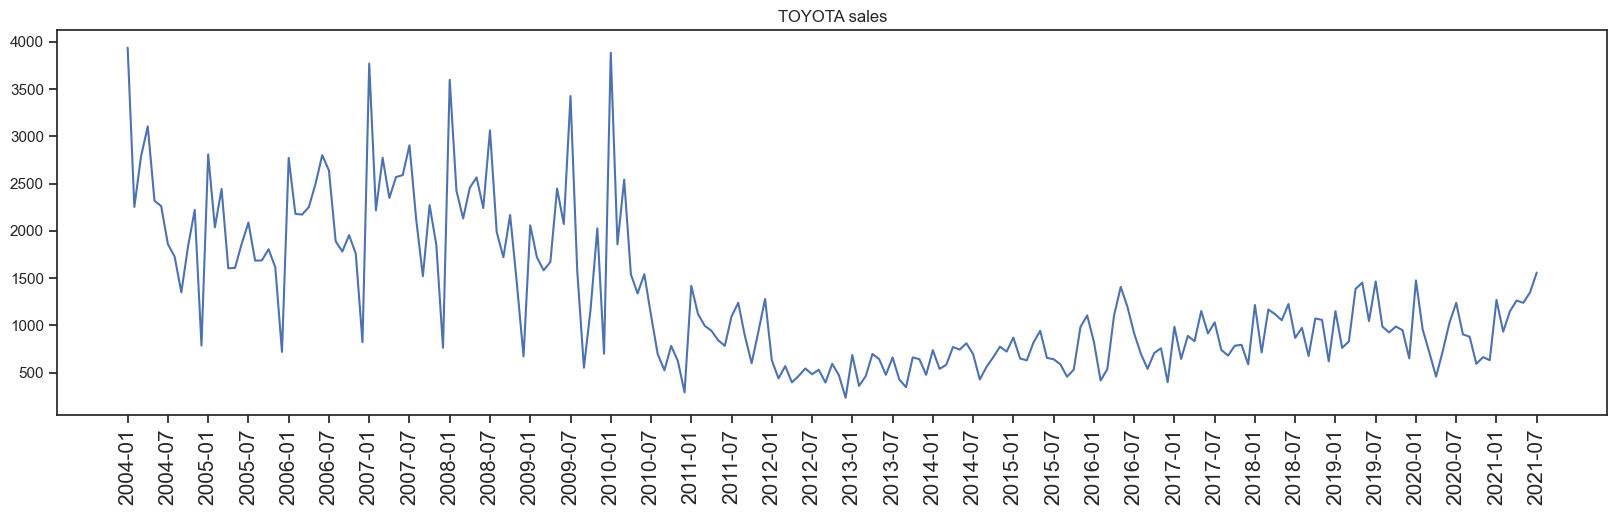

In [8]:
plt.figure(figsize=(20,5))



plt.plot(toyota['TOYOTA'])

plt.xticks(range(0,211,6))

plt.tick_params(axis='x', which='major',labelsize=15,labelrotation=90)
plt.title("TOYOTA sales")

plt.show()

# For the rest of the car brands

#### Calculation through a loop



AUDI


correlation matrix AUDI


,AUDI,gt1_audi,gt2_audi,unemployment,Qgdp_Maverage,gas_wt,gas_wot,gd_at,gt_crisisTh,gt_memTh,gt_debtTh,gt_cuts,gt_fir
AUDI,1.000000,0.674998,0.301419,-0.688741,0.559029,-0.682717,-0.366565,0.635161,0.021833,-0.308720,-0.083524,-0.298406,-0.306536
gt1_audi,0.674998,1.000000,0.454666,-0.815058,0.703160,-0.775227,-0.390944,0.801156,0.033163,-0.306879,-0.076688,-0.301202,-0.337173
gt2_audi,0.301419,0.454666,1.000000,-0.328334,0.173621,-0.306188,-0.105822,0.471634,-0.311272,-0.252718,-0.203740,-0.207600,-0.344315
unemployment,-0.688741,-0.815058,-0.328334,1.000000,-0.727734,0.796695,0.470677,-0.777233,-0.040355,0.260509,0.026303,0.241443,0.235296
Qgdp_Maverage,0.559029,0.703160,0.173621,-0.727734,1.000000,-0.496121,-0.027090,0.697476,0.249389,-0.077801,0.185570,-0.152874,-0.121166
gas_wt,-0.682717,-0.775227,-0.306188,0.796695,-0.496121,1.000000,0.749629,-0.755282,0.028470,0.353741,0.179766,0.354197,0.391470
gas_wot,-0.366565,-0.390944,-0.105822,0.470677,-0.027090,0.749629,1.000000,-0.245795,0.056564,0.327186,0.177939,0.154308,0.250063
gd_at,0.635161,0.801156,0.471634,-0.777233,0.697476,-0.755282,-0.245795,1.000000,-0.143414,-0.256556,-0.113330,-0.348506,-0.366579
gt_crisisTh,0.021833,0.033163,-0.311272,-0.040355,0.249389,0.028470,0.056564,-0.143414,1.000000,0.246019,0.295035,0.131387,0.315714
gt_memTh,-0.308720,-0.306879,-0.252718,0.260509,-0.077801,0.353741,0.327186,-0.256556,0.246019,1.000000,0.232322,0.161938,0.256704




optimal lags AUDI


,gt1_audi,gt2_audi,unemployment,Qgdp_Maverage,gas_wt,gas_wot,gd_at,gt_crisisTh,gt_memTh,gt_debtTh,gt_cuts,gt_fir
opt,3.000000,1.000000,2.000000,16.000000,0.000000,62.000000,1.000000,43.000000,72.000000,33.000000,3.000000,2.000000
cor_opt,0.696776,0.314263,-0.711680,0.694057,-0.682281,0.401730,0.640729,0.355986,0.348252,0.327636,-0.298904,-0.331365
cor4,0.688360,0.243354,-0.707164,0.681323,-0.671012,-0.359044,0.622057,0.057292,-0.250021,-0.058130,-0.256052,-0.242021
cor12,0.581601,0.116998,-0.682190,0.601958,-0.532204,-0.301049,0.555093,0.179323,-0.066962,0.113892,-0.104388,-0.115495


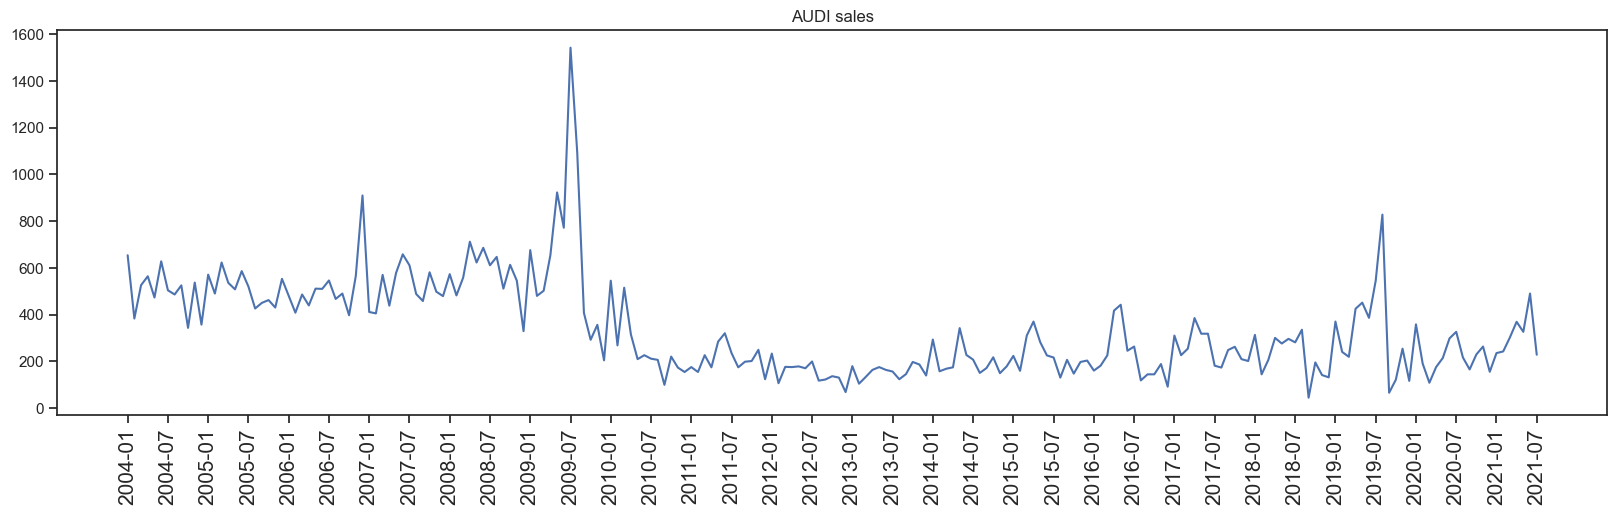



OPEL


correlation matrix OPEL


,OPEL,gt1_opel,gt2_opel,unemployment,Qgdp_Maverage,gas_wt,gas_wot,gd_at,gt_crisisTh,gt_memTh,gt_debtTh,gt_cuts,gt_fir
OPEL,1.000000,0.678156,0.737669,-0.735964,0.557853,-0.737438,-0.319504,0.763059,-0.050380,-0.211240,-0.070427,-0.229840,-0.356578
gt1_opel,0.678156,1.000000,0.862378,-0.757974,0.566806,-0.784091,-0.417458,0.760917,-0.075863,-0.316899,-0.120135,-0.320528,-0.316740
gt2_opel,0.737669,0.862378,1.000000,-0.758604,0.597927,-0.780382,-0.392697,0.776780,-0.036116,-0.302761,-0.114724,-0.317839,-0.300105
unemployment,-0.735964,-0.757974,-0.758604,1.000000,-0.727734,0.796695,0.470677,-0.777233,-0.040355,0.260509,0.026303,0.241443,0.235296
Qgdp_Maverage,0.557853,0.566806,0.597927,-0.727734,1.000000,-0.496121,-0.027090,0.697476,0.249389,-0.077801,0.185570,-0.152874,-0.121166
gas_wt,-0.737438,-0.784091,-0.780382,0.796695,-0.496121,1.000000,0.749629,-0.755282,0.028470,0.353741,0.179766,0.354197,0.391470
gas_wot,-0.319504,-0.417458,-0.392697,0.470677,-0.027090,0.749629,1.000000,-0.245795,0.056564,0.327186,0.177939,0.154308,0.250063
gd_at,0.763059,0.760917,0.776780,-0.777233,0.697476,-0.755282,-0.245795,1.000000,-0.143414,-0.256556,-0.113330,-0.348506,-0.366579
gt_crisisTh,-0.050380,-0.075863,-0.036116,-0.040355,0.249389,0.028470,0.056564,-0.143414,1.000000,0.246019,0.295035,0.131387,0.315714
gt_memTh,-0.211240,-0.316899,-0.302761,0.260509,-0.077801,0.353741,0.327186,-0.256556,0.246019,1.000000,0.232322,0.161938,0.256704




optimal lags OPEL


,gt1_opel,gt2_opel,unemployment,Qgdp_Maverage,gas_wt,gas_wot,gd_at,gt_crisisTh,gt_memTh,gt_debtTh,gt_cuts,gt_fir
opt,1.000000,3.000000,3.000000,15.000000,0.000000,83.000000,0.000000,52.000000,72.000000,69.000000,3.000000,0.000000
cor_opt,0.678541,0.738275,-0.740017,0.750603,-0.736231,0.383145,0.762550,0.485268,0.380831,0.322607,-0.294552,-0.357807
cor4,0.651617,0.669788,-0.735896,0.696742,-0.689999,-0.250412,0.737391,0.070241,-0.186187,-0.074596,-0.254439,-0.268011
cor12,0.607712,0.609790,-0.687655,0.609500,-0.580642,-0.161084,0.675215,0.131105,-0.057041,0.058384,-0.201343,-0.192121


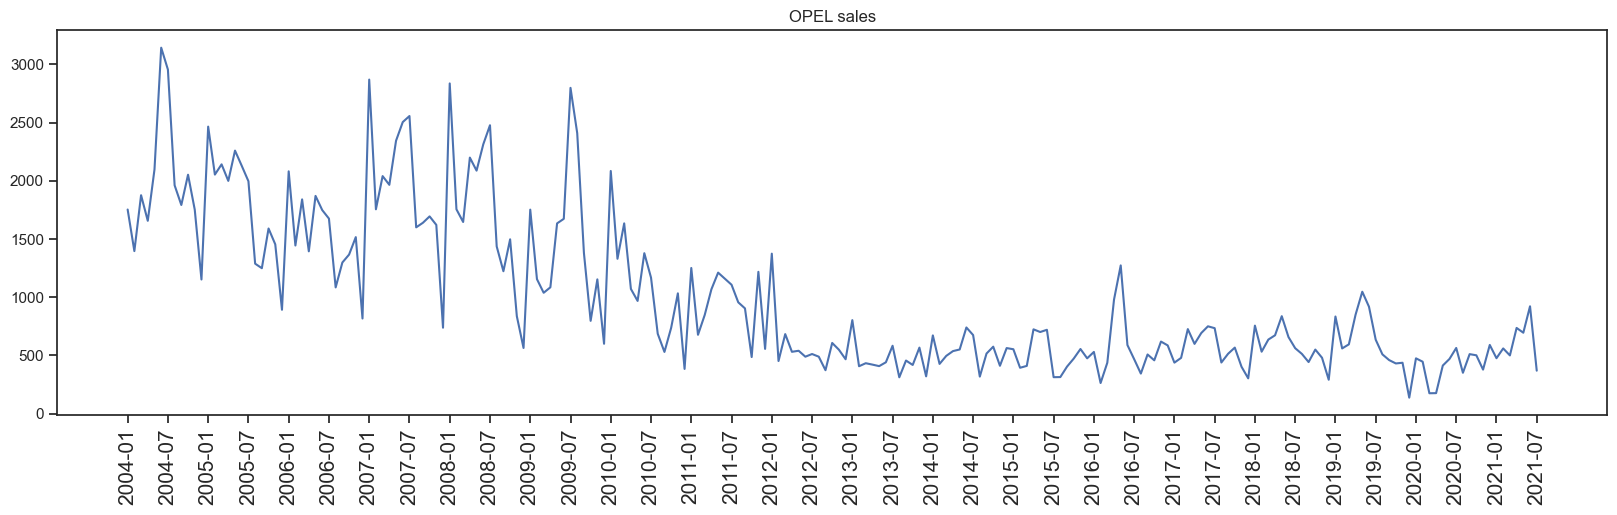



FORD


correlation matrix FORD


,FORD,gt1_ford,gt2_ford,unemployment,Qgdp_Maverage,gas_wt,gas_wot,gd_at,gt_crisisTh,gt_memTh,gt_debtTh,gt_cuts,gt_fir
FORD,1.000000,0.716405,-0.066874,-0.797493,0.605552,-0.834806,-0.399397,0.833348,-0.001563,-0.251105,-0.112138,-0.257431,-0.345399
gt1_ford,0.716405,1.000000,-0.078113,-0.765933,0.435478,-0.812747,-0.559216,0.664040,0.030105,-0.304880,-0.198463,-0.303058,-0.326045
gt2_ford,-0.066874,-0.078113,1.000000,-0.033140,-0.008179,0.218557,0.242065,0.006000,0.004018,0.043762,0.136983,0.159181,0.134194
unemployment,-0.797493,-0.765933,-0.033140,1.000000,-0.727734,0.796695,0.470677,-0.777233,-0.040355,0.260509,0.026303,0.241443,0.235296
Qgdp_Maverage,0.605552,0.435478,-0.008179,-0.727734,1.000000,-0.496121,-0.027090,0.697476,0.249389,-0.077801,0.185570,-0.152874,-0.121166
gas_wt,-0.834806,-0.812747,0.218557,0.796695,-0.496121,1.000000,0.749629,-0.755282,0.028470,0.353741,0.179766,0.354197,0.391470
gas_wot,-0.399397,-0.559216,0.242065,0.470677,-0.027090,0.749629,1.000000,-0.245795,0.056564,0.327186,0.177939,0.154308,0.250063
gd_at,0.833348,0.664040,0.006000,-0.777233,0.697476,-0.755282,-0.245795,1.000000,-0.143414,-0.256556,-0.113330,-0.348506,-0.366579
gt_crisisTh,-0.001563,0.030105,0.004018,-0.040355,0.249389,0.028470,0.056564,-0.143414,1.000000,0.246019,0.295035,0.131387,0.315714
gt_memTh,-0.251105,-0.304880,0.043762,0.260509,-0.077801,0.353741,0.327186,-0.256556,0.246019,1.000000,0.232322,0.161938,0.256704




optimal lags FORD


,gt1_ford,gt2_ford,unemployment,Qgdp_Maverage,gas_wt,gas_wot,gd_at,gt_crisisTh,gt_memTh,gt_debtTh,gt_cuts,gt_fir
opt,0.000000,97.000000,3.000000,17.000000,0.000000,72.000000,3.000000,57.000000,71.000000,46.000000,1.000000,1.000000
cor_opt,0.717357,-0.142230,-0.808749,0.812162,-0.834208,0.424165,0.836504,0.489343,0.401561,0.392359,-0.298063,-0.347296
cor4,0.631542,-0.062511,-0.805075,0.725724,-0.771769,-0.329225,0.834815,0.014910,-0.222667,-0.060445,-0.271767,-0.290412
cor12,0.581023,0.088903,-0.771360,0.712289,-0.637911,-0.185330,0.805209,0.085223,-0.089308,0.055382,-0.190937,-0.257416


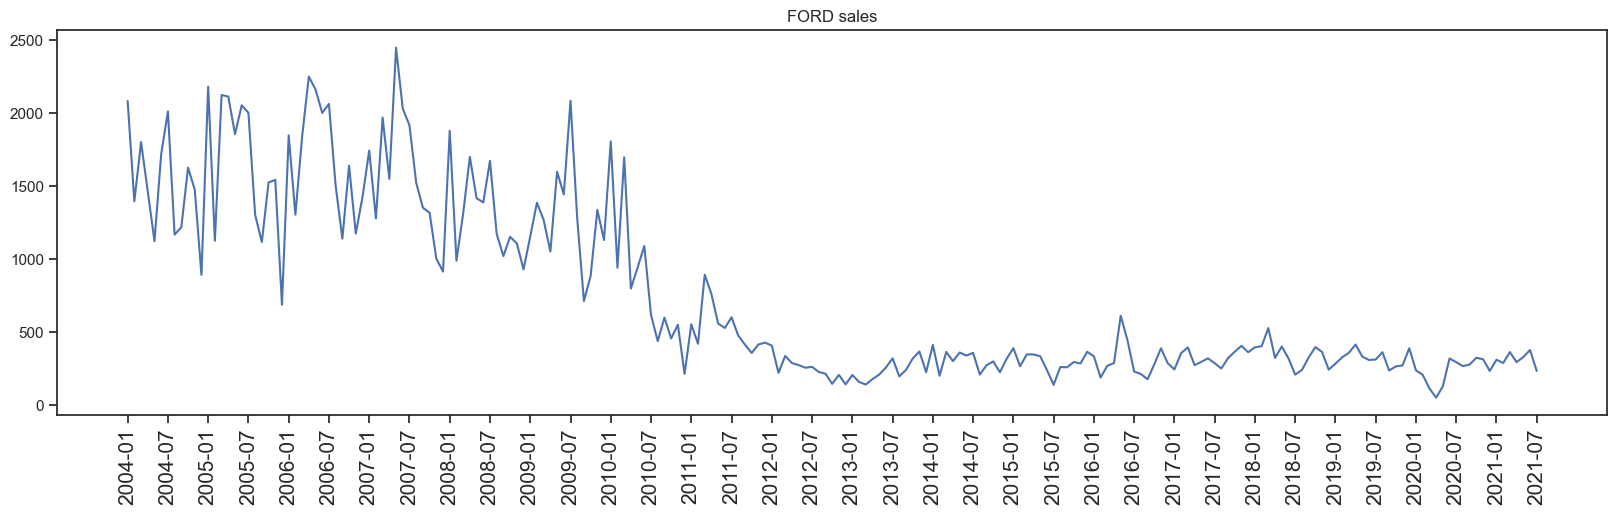



FIAT


correlation matrix FIAT


,FIAT,gt1_fiat,gt2_fiat,unemployment,Qgdp_Maverage,gas_wt,gas_wot,gd_at,gt_crisisTh,gt_memTh,gt_debtTh,gt_cuts,gt_fir
FIAT,1.000000,0.249116,0.047448,-0.650731,0.468892,-0.624840,-0.313365,0.573694,0.023298,-0.197449,-0.070486,-0.107700,-0.304601
gt1_fiat,0.249116,1.000000,0.300841,-0.519242,0.361679,-0.388516,-0.282981,0.440361,-0.118091,-0.331297,-0.122351,-0.095763,-0.174190
gt2_fiat,0.047448,0.300841,1.000000,-0.081828,0.162109,0.042120,0.212851,0.205055,0.121775,-0.045629,-0.020190,-0.036078,-0.051836
unemployment,-0.650731,-0.519242,-0.081828,1.000000,-0.727734,0.796695,0.470677,-0.777233,-0.040355,0.260509,0.026303,0.241443,0.235296
Qgdp_Maverage,0.468892,0.361679,0.162109,-0.727734,1.000000,-0.496121,-0.027090,0.697476,0.249389,-0.077801,0.185570,-0.152874,-0.121166
gas_wt,-0.624840,-0.388516,0.042120,0.796695,-0.496121,1.000000,0.749629,-0.755282,0.028470,0.353741,0.179766,0.354197,0.391470
gas_wot,-0.313365,-0.282981,0.212851,0.470677,-0.027090,0.749629,1.000000,-0.245795,0.056564,0.327186,0.177939,0.154308,0.250063
gd_at,0.573694,0.440361,0.205055,-0.777233,0.697476,-0.755282,-0.245795,1.000000,-0.143414,-0.256556,-0.113330,-0.348506,-0.366579
gt_crisisTh,0.023298,-0.118091,0.121775,-0.040355,0.249389,0.028470,0.056564,-0.143414,1.000000,0.246019,0.295035,0.131387,0.315714
gt_memTh,-0.197449,-0.331297,-0.045629,0.260509,-0.077801,0.353741,0.327186,-0.256556,0.246019,1.000000,0.232322,0.161938,0.256704




optimal lags FIAT


,gt1_fiat,gt2_fiat,unemployment,Qgdp_Maverage,gas_wt,gas_wot,gd_at,gt_crisisTh,gt_memTh,gt_debtTh,gt_cuts,gt_fir
opt,3.000000,44.000000,3.000000,5.000000,0.000000,50.000000,0.000000,57.000000,72.000000,70.000000,100.000000,0.000000
cor_opt,0.344013,0.291693,-0.673579,0.621966,-0.623409,0.402655,0.572675,0.492536,0.300205,0.311447,0.253963,-0.305481
cor4,0.304692,0.012942,-0.663131,0.621231,-0.596953,-0.302340,0.523108,0.094007,-0.199046,-0.079850,-0.148586,-0.192538
cor12,0.227907,0.058043,-0.630621,0.446105,-0.498291,-0.237057,0.487066,0.120025,-0.022022,0.077264,-0.143044,-0.122567


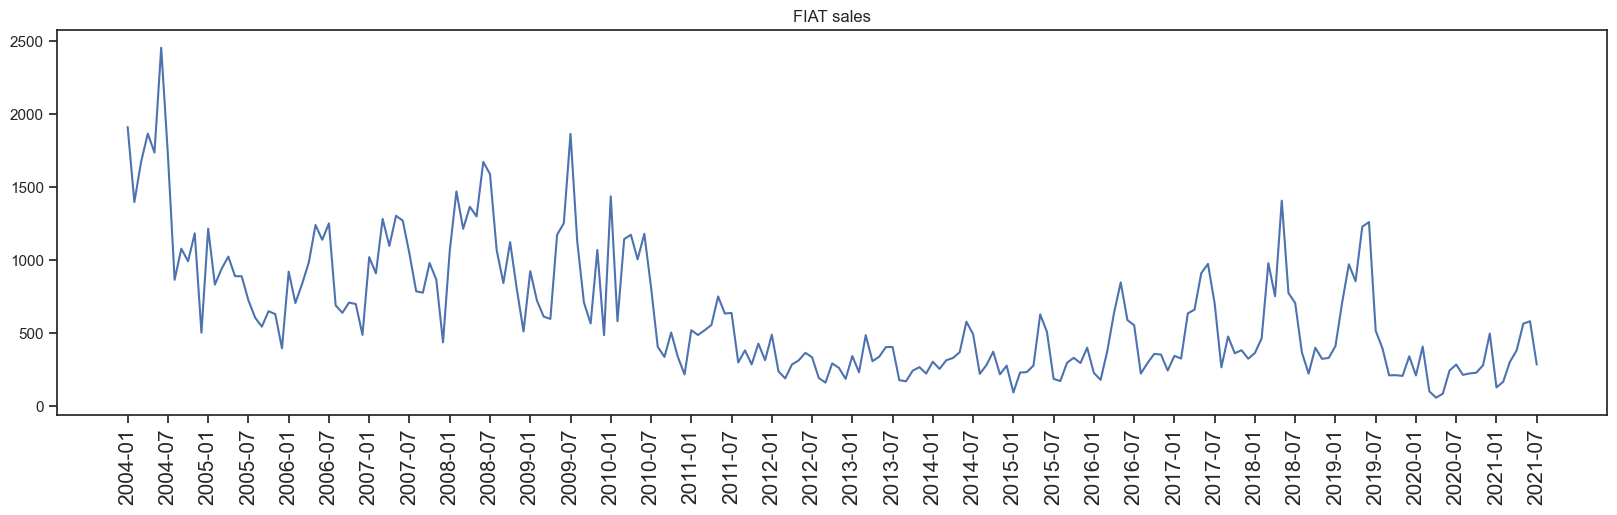

In [13]:
l=[]
for k in ["audi","opel","ford","fiat"]:
    
    print("")
    print("")
    print(k.upper())
    ds=dataset.loc[:,[k.upper(),'gt1_'+k,'gt2_'+k]+list(dataset.columns[16:])]
    

    #sns.set_theme(style="ticks")

    #sns.pairplot(ds)
    #plt.show()
    
    print("")
    print("")
    print('correlation matrix '+k.upper())
    display(ds.corr())


    cr_v={}
    for i in ds.columns[1:]:
        if i == 'unemployment':
            y=ds[k.upper()][:-2]
            x=ds[f'{i}'][:-2]
            c=sm.tsa.stattools.ccf(x, y, adjusted=False)
            cr_v[f"{i}"]=[np.argmax(abs(c)),c[np.argmax(abs(c))],c[4],c[12]]

        elif i == 'Qgdp_Maverage': 
            y=ds[k.upper()][:-4]
            x=ds[f'{i}'][:-4]      
            c=sm.tsa.stattools.ccf(x, y, adjusted=False) 
            cr_v[f"{i}"]=[np.argmax(abs(c)),c[np.argmax(abs(c))],c[4],c[12]]



        else:        
            y=ds[k.upper()][:-1]
            x=ds[f'{i}'][:-1]
            c=sm.tsa.stattools.ccf(x, y, adjusted=False)
            cr_v[f"{i}"]=[np.argmax(abs(c)),c[np.argmax(abs(c))],c[4],c[12]]
        
        



    print("")
    print("")
    print("optimal lags "+k.upper())
    display(pd.DataFrame(cr_v,index=['opt','cor_opt','cor4','cor12']))

    plt.figure(figsize=(20,5))



    plt.plot(ds[k.upper()])

    plt.xticks(range(0,211,6))

    plt.tick_params(axis='x', which='major',labelsize=15,labelrotation=90)
    
    plt.title(k.upper()+" sales")

    plt.show()
    
    l.append(cr_v)



    

In [17]:
pd.DataFrame(l[2])

,gt1_ford,gt2_ford,unemployment,Qgdp_Maverage,gas_wt,gas_wot,gd_at,gt_crisisTh,gt_memTh,gt_debtTh,gt_cuts,gt_fir
0,0.000000,97.000000,3.000000,17.000000,0.000000,72.000000,3.000000,57.000000,71.000000,46.000000,1.000000,1.000000
1,0.717357,-0.142230,-0.808749,0.812162,-0.834208,0.424165,0.836504,0.489343,0.401561,0.392359,-0.298063,-0.347296
2,0.631542,-0.062511,-0.805075,0.725724,-0.771769,-0.329225,0.834815,0.014910,-0.222667,-0.060445,-0.271767,-0.290412
3,0.581023,0.088903,-0.771360,0.712289,-0.637911,-0.185330,0.805209,0.085223,-0.089308,0.055382,-0.190937,-0.257416


[{'gt1_audi': [3, 0.6967759490492843, 0.688359517601288, 0.5816014460951805],
  'gt2_audi': [1, 0.3142627063039865, 0.2433535626701604, 0.11699847343967171],
  'unemployment': [2,
   -0.7116801370615777,
   -0.7071641704383621,
   -0.6821901523057267],
  'Qgdp_Maverage': [16,
   0.694057217880402,
   0.6813227560148425,
   0.6019576571715118],
  'gas_wt': [0, -0.682280567411231, -0.6710122307958405, -0.5322041877379061],
  'gas_wot': [62,
   0.401729544465527,
   -0.3590440637173132,
   -0.30104854111738055],
  'gd_at': [1, 0.640728628234064, 0.6220574805607781, 0.5550930212736881],
  'gt_crisisTh': [43,
   0.3559857493071419,
   0.05729214237018705,
   0.17932318284849788],
  'gt_memTh': [72,
   0.34825179616449825,
   -0.25002104745702375,
   -0.06696184109278541],
  'gt_debtTh': [33,
   0.32763631630459555,
   -0.05813031602088172,
   0.11389186315760601],
  'gt_cuts': [3, -0.298903991998558, -0.256052459122252, -0.1043878140767528],
  'gt_fir': [2,
   -0.33136461753846674,
   -0.24